In [12]:
import sys
# sys.path.append("/home/lotterstatter/LES-utils/")
sys.path.append("/home/bgreene/LES-utils/")
import xarray as xr
import numpy as np
from spec import autocorr_1d
from LESutils import load_full
from matplotlib import pyplot as plt

In [2]:
# load data
dnc = "/home/lotterstatter/simulations/cbl/u15_q18_160/output/netcdf/"
t0 = 288000
t1 = 359000
dt = 1000
delta_t = 0.05
dd, s = load_full(dnc, t0, t1, dt, delta_t, False, "average_statistics.nc")

Loading files...
Reading file: /home/lotterstatter/simulations/cbl/u15_q18_160/output/netcdf/average_statistics.nc


In [3]:
# run autocorr_1d
autocorr_1d(dnc, dd)

Saving file: /home/lotterstatter/simulations/cbl/u15_q18_160/output/netcdf/R_1d.nc
[########################################] | 100% Completed |  2min  8.4s
Finished computing 1d autocorrelation functions!


In [5]:
# load autocorr
R = xr.load_dataset("/home/lotterstatter/simulations/cbl/u15_q18_160/output/netcdf/R_1d.nc")

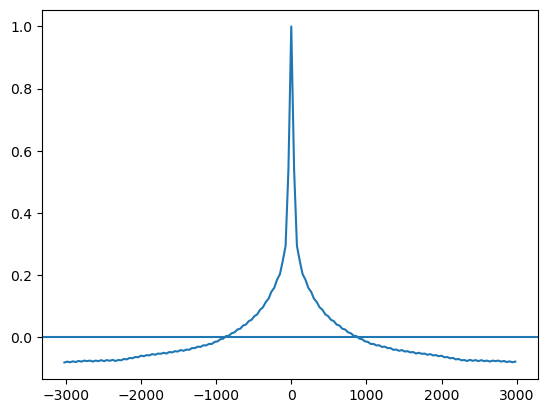

In [10]:
# plot R_uu at jz=0
plt.plot(R.x, R.u.isel(z=0))
plt.axhline(0)

In [16]:
# integrate up to first zero crossing to get integral lengthscale Lu
# only keep positive x lag values
R = R.where(R.x >= 0., drop=True)
# find first index where R.u.isel(z=0) goes to 0
izero = np.where(R.u.isel(z=0) <= 0)[0][0]
# integrate over indices 0:izero using numpy trapz
Lu = np.trapz(R.u.isel(z=0, x=range(izero)), R.x[:izero])

print(f"Integral lengthscale for u at jz=0: {Lu:4.1f} m")

Integral lengthscale for u at jz=0: 117.7 m


In [20]:
# do the same thing using xr.integrate
R.u.isel(z=0, x=range(izero)).integrate(coord="x")

<xarray.DataArray 'u' ()>
array(117.66371311)
Coordinates:
    z        float64 6.25

In [ ]:
# TODO: 1) LOOP OVER Z TO GET PROFILE OF Lu
# 2) loop over variables in R (i.e., u, v, w, theta, u_rot, v_rot)
# 3) perform for all simulations

# Use the Lumley and Panofsky (1964) equation to estimate relative random errors:

## $ \epsilon_f = \left[ \frac{2 \mathcal{T}_f \langle f'^2 \rangle}{\langle f \rangle^2 T} \right] ^{1/2}$

In [24]:
LT = 3. * s.u_mean_rot.isel(z=0)
err_u = ((2 * Lu * s.u_var.isel(z=0)) / (s.u_mean.isel(z=0)**2. * LT)) ** 0.5

print(f"Relative random error in u at jz=0: {err_u*100:5.4f}%")

Relative random error in u at jz=0: 73.4853%


In [23]:
# TODO: 4) plot profiles of resulting errors
# 5) plot these errors against those from RFM

<xarray.DataArray ()>
array(-7.49188643)